In [26]:
import numpy as np
import matplotlib.pyplot as plt

from lightkurve import search_targetpixelfile
from lightkurve import KeplerTargetPixelFile

from photutilspsf.photutilspsf import (wrapper_supplement_olivares_with_gaia_coordinates_on_tpf,
                                       define_iterative_photometry_with_finder,
                                       define_basic_photometry_with_fixed_centroids,
                                       do_photometry_with_fixed_centroids)
from photutilspsf.plots import plot_psf_photometry_results, plot_finder_results, plot_psfmodel


In [2]:
from copy import deepcopy
import pickle

In [3]:
#200062524 -- 200062583
EPIC = 219426848#200062560
C = 7
#index = 256
memberspath = 'data/olivares_members_r147.fit'

In [4]:
TPF = search_targetpixelfile(EPIC).download()
psf_model = pickle.load(open( "data/epsf29.p", "rb" ))


In [5]:
TPF.shape, psf_model.data.shape

((3778, 11, 11), (35, 35))

In [31]:
import warnings
warnings.simplefilter('ignore', UserWarning)
l = 3778 #TPF.flux.shape[0]
zerop = 2500

2500 (12, 2)
2501 (12, 2)
2502 (12, 2)
2503 (12, 2)
2504 (12, 2)
2505 (12, 2)
2506 (12, 2)
2507 (12, 2)
2508 (12, 2)
2509 (12, 2)
2510 (12, 2)
2511 (12, 2)
2512 (12, 2)
2513 (12, 2)
2514 (12, 2)
2515 (12, 2)
2516 (12, 2)
2517 (12, 2)
2518 (12, 2)
2519 (12, 2)
2520 (12, 2)
2521 (12, 2)
2522 (12, 2)
2523 (12, 2)
2524 (12, 2)
2525 (12, 2)
2526 (12, 2)
2527 (12, 2)


/usr/local/lib/python3.5/dist-packages/photutils/psf/photometry.py:431: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


2528 (12, 2)
2529 (12, 2)
2530 (12, 2)
2531 (12, 2)
2532 (12, 2)
2533 (12, 2)
2534 (12, 2)
2535 (12, 2)
2536 (12, 2)
2537 (12, 2)
2538 (12, 2)
2539 (12, 2)
2540 (12, 2)
2541 (12, 2)
2542 (12, 2)
2543 (12, 2)
2544 (12, 2)
2545 (12, 2)
2546 (12, 2)
2547 (12, 2)
2548 (12, 2)
2549 (12, 2)


/usr/local/lib/python3.5/dist-packages/photutils/psf/photometry.py:431: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


2550 (12, 2)
2551 (12, 2)
2552 (12, 2)
2553 (12, 2)
2554 (12, 2)
2555 (12, 2)
2556 (12, 2)
2557 (12, 2)
2558 (12, 2)
2559 (12, 2)
2560 (12, 2)
2561 (12, 2)
2562 (12, 2)
2563 (12, 2)
2564 (12, 2)
2565 (12, 2)
2566 (12, 2)
2567 (12, 2)
2568 (12, 2)
2569 (12, 2)
2570 (12, 2)
2571 (12, 2)
2572 (12, 2)


/usr/local/lib/python3.5/dist-packages/photutils/psf/photometry.py:431: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


2573 (12, 2)
2574 (12, 2)
2575 (12, 2)
2576 (12, 2)
2577 (12, 2)
2578 (12, 2)
2579 (12, 2)
2580 (12, 2)
2581 (12, 2)
2582 (12, 2)
2583 (12, 2)
2584 (12, 2)
2585 (12, 2)
2586 (12, 2)
2587 (12, 2)
2588 (12, 2)
2589 (12, 2)
2590 (12, 2)
2591 (12, 2)
2592 (12, 2)
2593 (12, 2)
2594 (12, 2)
2595 (12, 2)
2596 (12, 2)
2597 (12, 2)
2598 (12, 2)
2599 (12, 2)
2600 (12, 2)
2601 (12, 2)
2602 (12, 2)
2603 (12, 2)
2604 (12, 2)
2605 (12, 2)
2606 (12, 2)
2607 (12, 2)
2608 (12, 2)
2609 (12, 2)
2610 (12, 2)
2611 (12, 2)
2612 (12, 2)
2613 (12, 2)
2614 (12, 2)
2615 (12, 2)
2616 (12, 2)
2617 (12, 2)
2618 (12, 2)
2619 (12, 2)
2620 (12, 2)
2621 (12, 2)
2622 (12, 2)
2623 (12, 2)
2624 (12, 2)
2625 (12, 2)
2626 (12, 2)
2627 (12, 2)
2628 (12, 2)
2629 (12, 2)
2630 (12, 2)
2631 (12, 2)
2632 (12, 2)
2633 (12, 2)
2634 (12, 2)
2635 (12, 2)
2636 (12, 2)
2637 (12, 2)
2638 (12, 2)
2639 (12, 2)
2640 (12, 2)
2641 (12, 2)
2642 (12, 2)
2643 (12, 2)
2644 (12, 2)
2645 (12, 2)
2646 (12, 2)
2647 (12, 2)
2648 (12, 2)
2649 (12, 2)

/usr/local/lib/python3.5/dist-packages/photutils/psf/photometry.py:431: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


2682 (12, 2)
2683 (12, 2)
2684 (12, 2)
2685 (12, 2)
2686 (12, 2)
2687 (12, 2)
2688 (12, 2)
2689 (12, 2)
2690 (12, 2)
2691 (12, 2)
2692 (12, 2)
2693 (12, 2)
2694 (12, 2)
2695 (12, 2)
2696 (12, 2)
2697 (12, 2)
2698 (12, 2)
2699 (12, 2)
2700 (12, 2)


/usr/local/lib/python3.5/dist-packages/photutils/psf/photometry.py:431: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


2701 (12, 2)
2702 (12, 2)
2703 (12, 2)
2704 (12, 2)
2705 (12, 2)
2706 (12, 2)
2707 (12, 2)
2708 (12, 2)
2709 (12, 2)
2710 (12, 2)
2711 (12, 2)
2712 (12, 2)
2713 (12, 2)
2714 (12, 2)
2715 (12, 2)
2716 (12, 2)
2717 (12, 2)
2718 (12, 2)
2719 (12, 2)
2720 (12, 2)
2721 (12, 2)
2722 (12, 2)
2723 (12, 2)
2724 (12, 2)
2725 (12, 2)
2726 (12, 2)
2727 (12, 2)
2728 (12, 2)
2729 (12, 2)
2730 (12, 2)
2731 (12, 2)
2732 (12, 2)
2733 (12, 2)
2734 (12, 2)
2735 (12, 2)
2736 (12, 2)
2737 (12, 2)
2738 (12, 2)
2739 (12, 2)
2740 (12, 2)
2741 (12, 2)
2742 (12, 2)
2743 (12, 2)
2744 (12, 2)
2745 (12, 2)
2746 (12, 2)
2747 (12, 2)
2748 (12, 2)
2749 (12, 2)
2750 (12, 2)
2751 (12, 2)
2752 (12, 2)
2753 (12, 2)
2754 (12, 2)
2755 (12, 2)
2756 (12, 2)
2757 (12, 2)


/usr/local/lib/python3.5/dist-packages/photutils/psf/photometry.py:431: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


2758 (12, 2)
2759 (12, 2)
2760 (12, 2)
2761 (12, 2)
2762 (12, 2)
2763 (12, 2)
2764 (12, 2)
2765 (12, 2)
2766 (12, 2)
2767 (12, 2)
2768 (12, 2)
2769 (12, 2)
2770 (12, 2)
2771 (12, 2)
2772 (12, 2)
2773 (12, 2)
2774 (12, 2)
2775 (12, 2)
2776 (12, 2)
2777 (12, 2)
2778 (12, 2)
2779 (12, 2)
2780 (12, 2)
2781 (12, 2)
2782 (12, 2)
2783 (12, 2)
2784 (12, 2)
2785 (12, 2)
2786 (12, 2)
2787 (12, 2)
2788 (12, 2)
2789 (12, 2)
2790 (12, 2)
2791 (12, 2)
2792 (12, 2)
2793 (12, 2)
2794 (12, 2)
2795 (12, 2)
2796 (12, 2)
2797 (12, 2)
2798 (12, 2)
2799 (12, 2)
2800 (12, 2)
2801 (12, 2)
2802 (12, 2)
2803 (12, 2)
2804 (12, 2)


/usr/local/lib/python3.5/dist-packages/photutils/psf/photometry.py:431: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


2805 (12, 2)
2806 (12, 2)
2807 (12, 2)
2808 (12, 2)
2809 (12, 2)
2810 (12, 2)
2811 (12, 2)
2812 (12, 2)
2813 (12, 2)
2814 (12, 2)
2815 (12, 2)
2816 (12, 2)
2817 (12, 2)
2818 (12, 2)
2819 (12, 2)
2820 (12, 2)
2821 (12, 2)
2822 (12, 2)
2823 (12, 2)
2824 (12, 2)
2825 (12, 2)
2826 (12, 2)
2827 (12, 2)
2828 (12, 2)
2829 (12, 2)
2830 (12, 2)
2831 (12, 2)
2832 (12, 2)
2833 (12, 2)
2834 (12, 2)
2835 (12, 2)
2836 (12, 2)
2837 (12, 2)
2838 (12, 2)
2839 (12, 2)
2840 (12, 2)
2841 (12, 2)
2842 (12, 2)
2843 (12, 2)
2844 (12, 2)
2845 (12, 2)


/usr/local/lib/python3.5/dist-packages/photutils/psf/photometry.py:431: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


2846 (12, 2)
2847 (12, 2)
2848 (12, 2)
2849 (12, 2)
2850 (12, 2)
2851 (12, 2)
2852 (12, 2)
2853 (12, 2)
2854 (12, 2)


/usr/local/lib/python3.5/dist-packages/photutils/psf/photometry.py:431: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


2855 (12, 2)
2856 (12, 2)
2857 (12, 2)
2858 (12, 2)
2859 (12, 2)
2860 (12, 2)
2861 (12, 2)
2862 (12, 2)
2863 (12, 2)
2864 (12, 2)
2865 (12, 2)
2866 (12, 2)
2867 (12, 2)
2868 (12, 2)
2869 (12, 2)
2870 (12, 2)
2871 (12, 2)
2872 (12, 2)
2873 (12, 2)
2874 (12, 2)
2875 (12, 2)
2876 (12, 2)
2877 (12, 2)
2878 (12, 2)
2879 (12, 2)
2880 (12, 2)
2881 (12, 2)
2882 (12, 2)
2883 (12, 2)
2884 (12, 2)
2885 (12, 2)
2886 (12, 2)
2887 (12, 2)
2888 (12, 2)
2889 (12, 2)
2890 (12, 2)
2891 (12, 2)
2892 (12, 2)
2893 (12, 2)
2894 (12, 2)
2895 (12, 2)
2896 (12, 2)
2897 (12, 2)
2898 (12, 2)
2899 (12, 2)
2900 (12, 2)
2901 (12, 2)
2902 (12, 2)
2903 (12, 2)
2904 (12, 2)
2905 (12, 2)
2906 (12, 2)
2907 (12, 2)
2908 (12, 2)
2909 (12, 2)
2910 (12, 2)
2911 (12, 2)
2912 (12, 2)


/usr/local/lib/python3.5/dist-packages/photutils/psf/photometry.py:431: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


2913 (12, 2)
2914 (12, 2)
2915 (12, 2)
2916 (12, 2)
2917 (12, 2)
2918 (12, 2)
2919 (12, 2)
2920 (12, 2)
2921 (12, 2)
2922 (12, 2)
2923 (12, 2)
2924 (12, 2)
2925 (12, 2)
2926 (12, 2)
2927 (12, 2)
2928 (12, 2)


KeyboardInterrupt: 

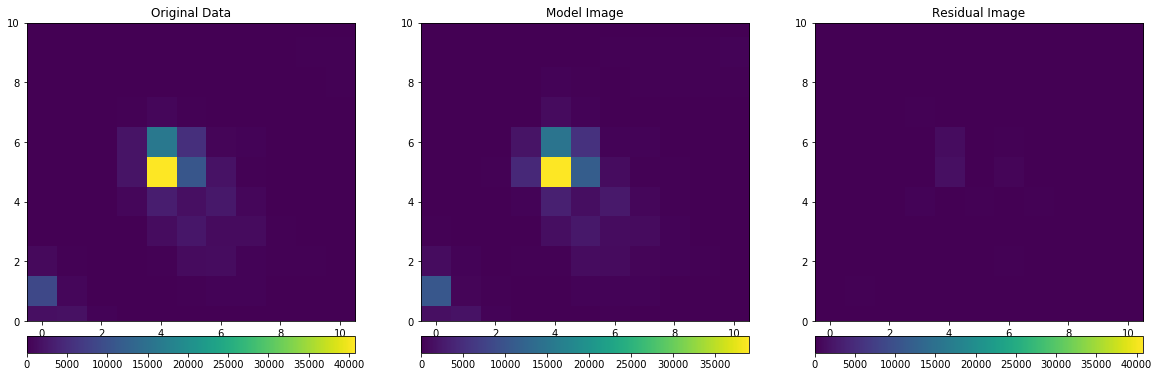

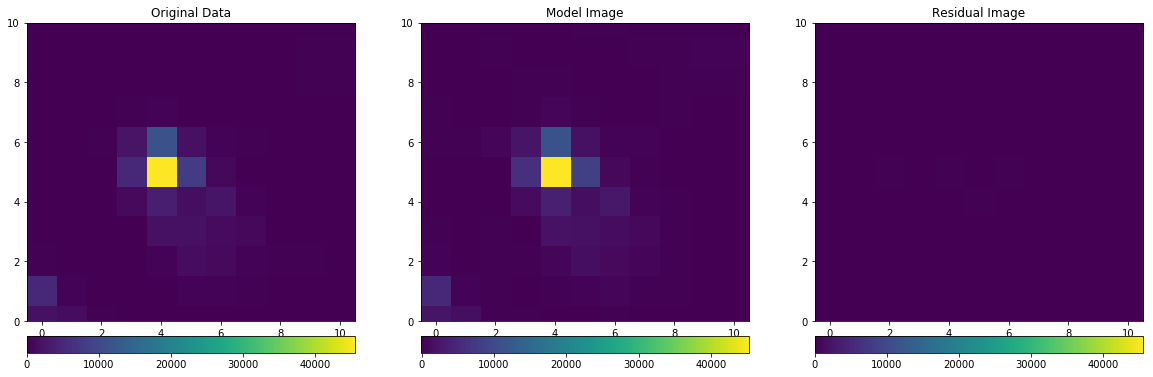

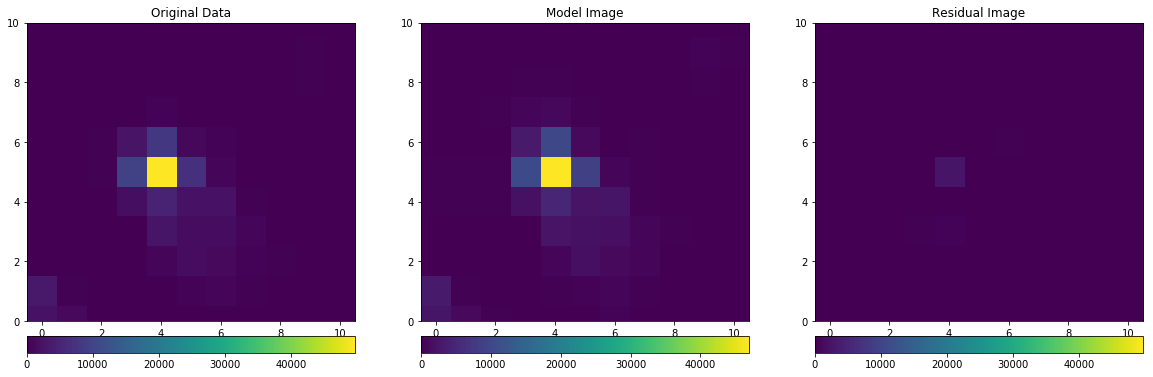

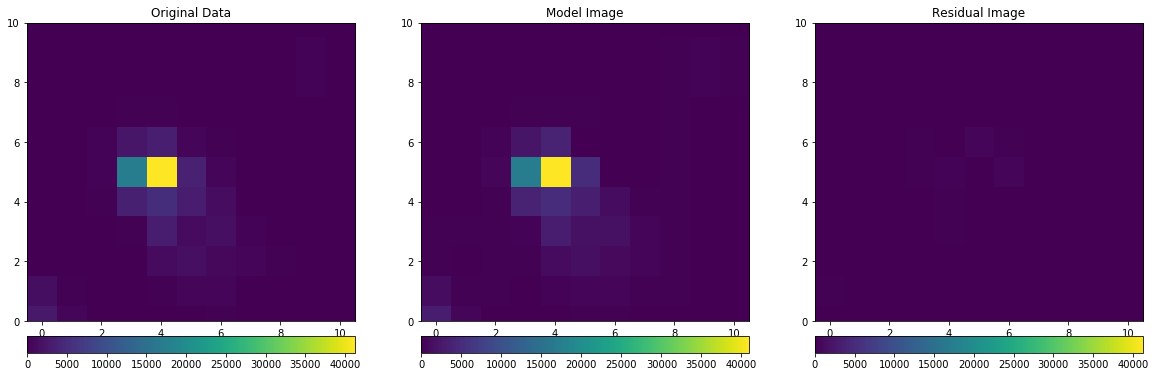

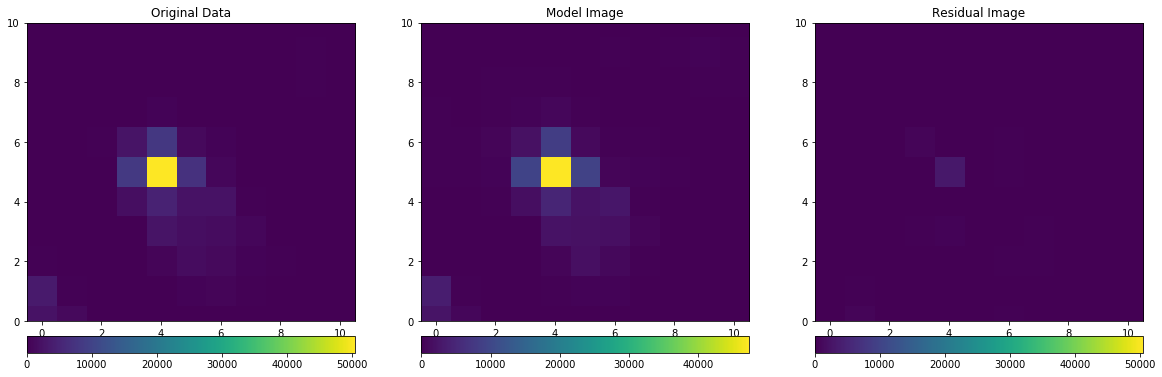

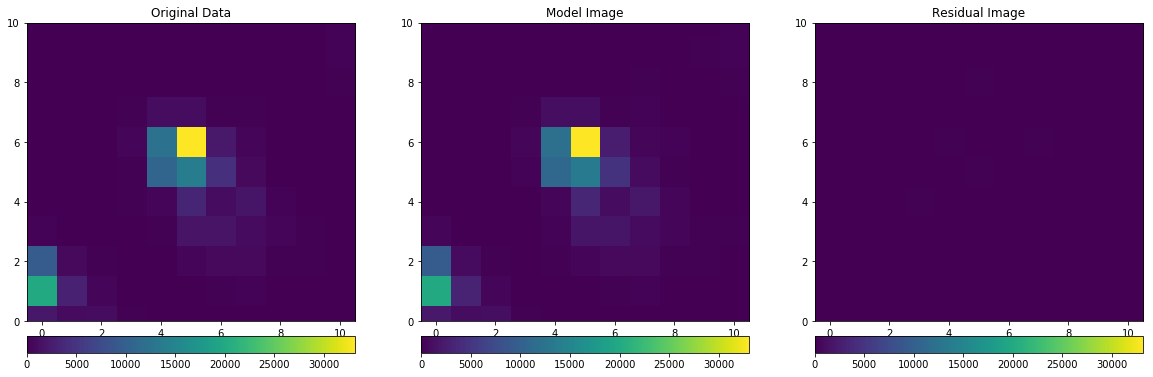

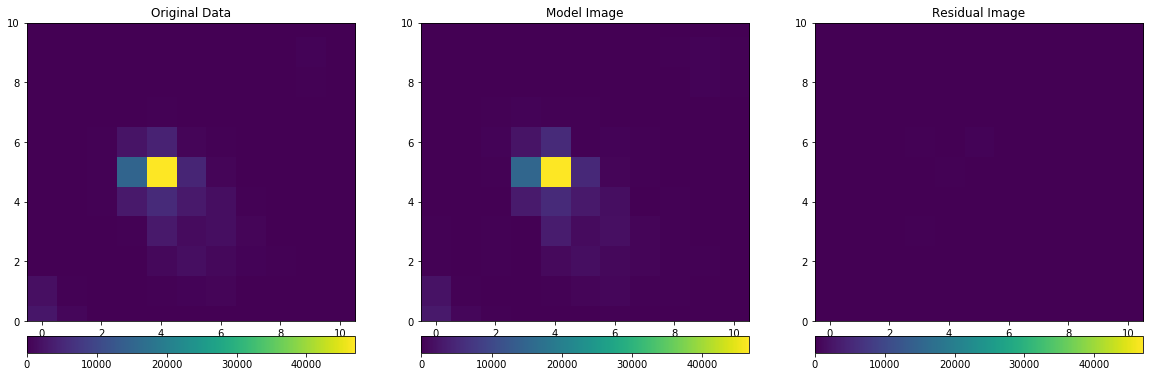

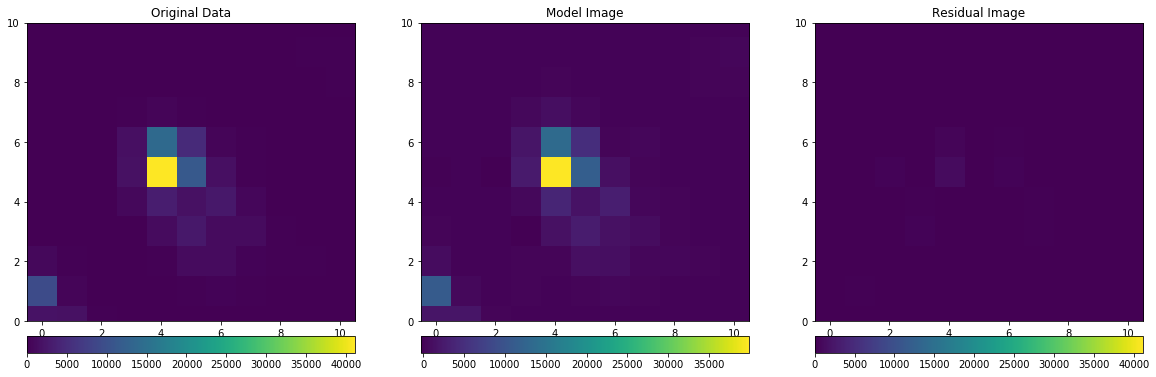

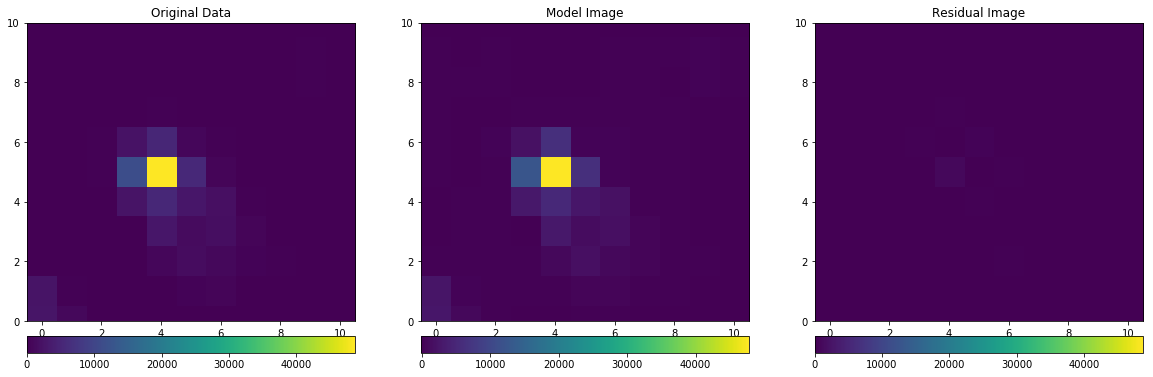

In [32]:
results = np.ndarray((l,12,2))
for index in range(zerop,zerop+l):
    image = TPF.flux[index,:,:]
    size = TPF.shape[1]
    if size%2==1:
        fitshape = size-2
    elif size%2==0:
        fitshape = size-1    
#     photometry = define_basic_photometry_with_fixed_centroids(sigma_psf=.65, group_psf=1.5,
#                                                               psf_model=psf_model,
#                                                               fitshape=min(fitshape, 11))
#     result =  (do_photometry_with_fixed_centroids(photometry, memberspath, TPF, index, get_saved=True,
#                                                  brightest=1)
#                 .to_pandas())
    photometry = define_iterative_photometry_with_finder(image, sigma_psf=0.5, group_psf=1.5,
                                            grouper=None,psf_model=psf_model,
                                            fitshape=9,niters=10, finder=None)
    result_tab = photometry(image=image).to_pandas()
    residual_image = photometry.get_residual_image()
    
    result = result_tab.sort_values(by='flux_fit', ascending=False).iloc[:2,:]
    results[index-zerop,:,:] = result.T.values
    print(index, result.T.values.shape)

    #print(result.columns.values)
    if index%50==0:
        residual_image = photometry.get_residual_image()
        plot_psf_photometry_results(image, residual_image)
        plt.clim(np.nanmin(image), np.nanmax(image))
        plt.savefig('plots/image_subs_219426848_{}.png'.format(index),dpi=300)

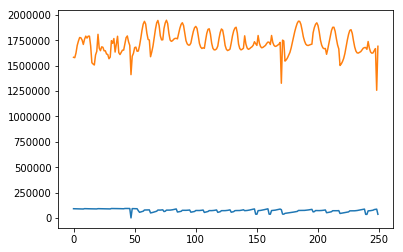

In [36]:
%matplotlib inline
plt.plot(first[:250,0])
plt.plot(first[:250,3])

In [38]:
from altaipony.flarelc import FlareLightCurve
first = results[:,:,0]
l=400
flc = FlareLightCurve(time=TPF.time[zerop:zerop+l],
                      flux=first[:400,0],
                      flux_err=first[:400,-1],
                      centroid_col=TPF.pos_corr1[zerop:zerop+l],
                      centroid_row=TPF.pos_corr2[zerop:zerop+l],
                      pos_corr1=TPF.pos_corr1[zerop:zerop+l],
                      pos_corr2=TPF.pos_corr2[zerop:zerop+l],
                      targetid=int(first[0,0]),
                      pixel_flux=TPF.flux[zerop:zerop+l],
                      pixel_flux_err=TPF.flux_err[zerop:zerop+l],
                      channel=TPF.channel,
                      campaign=TPF.campaign,
                      cadenceno = TPF.cadenceno[zerop:zerop+l],
                     origin='TPF')

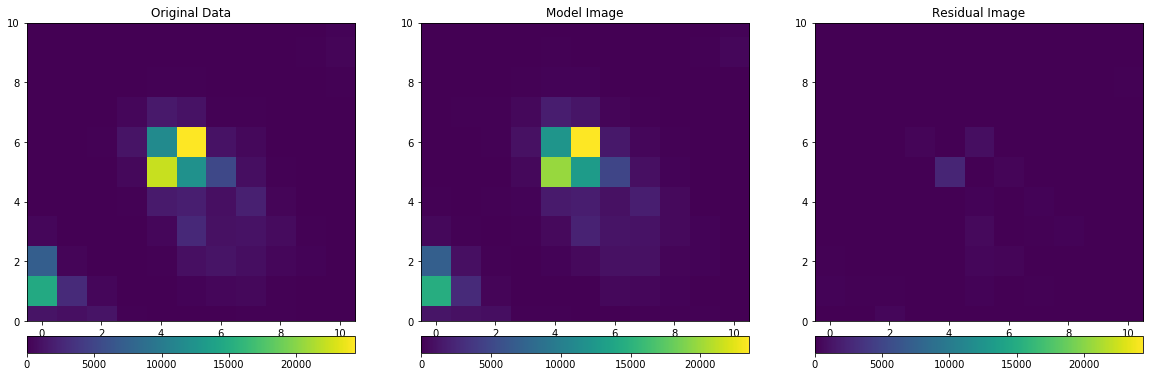

In [15]:
residual_image = photometry.get_residual_image()
plot_psf_photometry_results(image, residual_image)
plt.clim(np.nanmin(image), np.nanmax(image))
#plt.savefig('plots/example_psf_photometry.png',dpi=300)

In [35]:
result.columns.values

array(['flux_0', 'y_fit', 'x_0', 'flux_fit', 'y_0', 'x_fit', 'id',
       'group_id', 'flux_unc', 'x_0_unc', 'y_0_unc', 'iter_detected'],
      dtype=object)

In [67]:
flc.to_pandas().to_csv('pony_{}_{}_{}_26042019_iterative.csv'.format(flc.targetid,flc.campaign,flc.channel))

In [39]:
flcd = flc.detrend(campaign=7,de_niter=20, splits=[2468.5,2515], outlier_sigma=3)
#took the maximum 20 iterations, couldve been more for both 9- and 3-pixel fitshape

Using split values [2468.5, 2515] given from the command line
Starting initial outlier detection
  Flagged 2 ( 0.5%) outliers.
Starting Lomb-Scargle period search
  Using SqrExp position kernel
  No strong periodicity found, using a basic kernel
Starting global hyperparameter optimisation using DE
  DE iteration %3i -ln(L) %4.1f 0 -1176.8241192583198
  DE iteration %3i -ln(L) %4.1f 1 -1176.8241192583198
  DE iteration %3i -ln(L) %4.1f 2 -1195.2611717852797
  DE iteration %3i -ln(L) %4.1f 3 -1208.1671579152871
  DE iteration %3i -ln(L) %4.1f 4 -1208.1671579152871
  DE iteration %3i -ln(L) %4.1f 5 -1208.1671579152871
  DE iteration %3i -ln(L) %4.1f 6 -1208.1671579152871
  DE iteration %3i -ln(L) %4.1f 7 -1229.013847594195
  DE iteration %3i -ln(L) %4.1f 8 -1254.5614483037184
  DE iteration %3i -ln(L) %4.1f 9 -1254.5614483037184
  DE iteration %3i -ln(L) %4.1f 10 -1264.7308973743134
  DE iteration %3i -ln(L) %4.1f 11 -1271.799998215846
  DE iteration %3i -ln(L) %4.1f 12 -1273.317887423839

De-trending successfully completed.


  CDPP - raw - %6.3f 8229.212424146228
  CDPP - position component removed - %6.3f 5500.303066145919
  CDPP - full reduction - %6.3f 4785.23123809025
Detrending time %6.3f 63.83080697059631


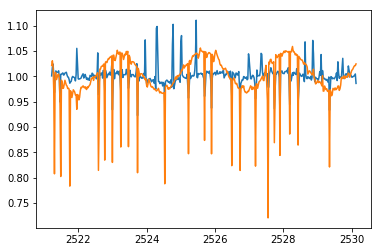

In [40]:
plt.plot(flcd.time, flcd.detrended_flux/np.median(flcd.detrended_flux))
plt.plot(flcd.time, flcd.flux/np.median(flcd.flux))

In [41]:
pickle.dump(flcd, open('data/pony_{}_{}_{}_26042019_psf_iterative_flux0.p'.format(flcd.targetid, flcd.campaign, flcd.channel),'wb'))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedWriter name='data/pony_96083_7_29_26042019_psf_iterative_flux0.p'>
  """Entry point for launching an IPython kernel.


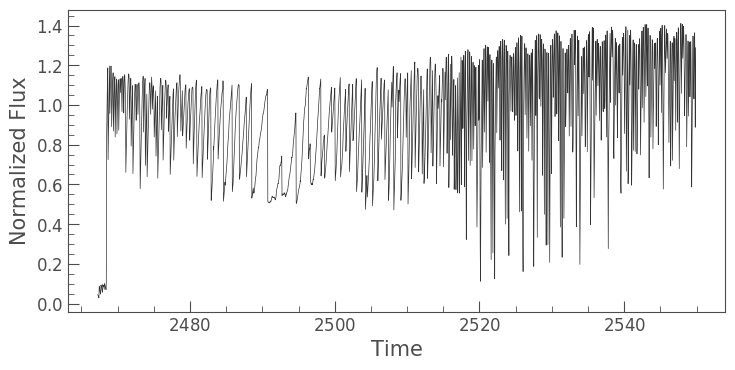

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
flc.plot();

In [ ]:
plot_finder_results(photometry, image)

In [ ]:
plot_psfmodel(psf_model)
plt.savefig('plots/example_epsf_model.png', dpi=300)

In [ ]:
TPF.channel